In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")

import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from bokeh.plotting import figure, show
from bokeh.tile_providers import get_provider, Vendors
from bokeh.io import save, reset_output, output_notebook
reset_output()
output_notebook()
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import geopandas as gpd
import seaborn as sns

from numpy import log, sqrt

Loading BokehJS ...

In [5]:
pip install geopandas

     |████████████████████████████████| 994 kB 355 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 549 kB/s  eta 0:00:01
     |████████████████████████████████| 7.6 MB 8.1 MB/s eta 0:00:01     |██████████████████████▋         | 5.4 MB 8.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install folium

     |████████████████████████████████| 94 kB 366 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pyarrow

     |████████████████████████████████| 17.6 MB 10.1 MB/s eta 0:00:01    |██████████████████▏             | 10.0 MB 10.1 MB/s eta 0:00:01     |███████████████████▏            | 10.5 MB 10.1 MB/s eta 0:00:01     |██████████████████████▏         | 12.1 MB 10.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
y_s1 = pd.read_feather('../preprocessed_data/y_18s1.feather').drop('index', axis=1)
y_s2 = pd.read_feather('../preprocessed_data/y_18s2.feather').drop('index', axis=1)
y_s3 = pd.read_feather('../preprocessed_data/y_18s3.feather').drop('index', axis=1)
y_s1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,01
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,01
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,01
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,01
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24548583,2,2018-03-31 23:34:47,2018-03-31 23:55:17,5,4.11,1,N,186,263,1,17.0,0.5,0.5,1.00,0.0,0.3,19.30,31
24548584,2,2018-03-31 23:02:38,2018-03-31 23:13:10,6,1.50,1,N,100,107,1,8.5,0.5,0.5,1.47,0.0,0.3,11.27,31
24548585,2,2018-03-31 23:15:58,2018-03-31 23:30:29,6,2.07,1,N,107,170,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30,31
24548586,1,2018-03-31 23:05:37,2018-03-31 23:18:31,2,1.60,1,N,163,164,2,10.0,0.5,0.5,0.00,0.0,0.3,11.30,31


In [9]:
y_s2 = pd.read_feather('../preprocessed_data/y_18s2.feather').drop('index', axis=1)
y_s3 = pd.read_feather('../preprocessed_data/y_18s3.feather').drop('index', axis=1)

In [4]:
data = {'date':y_s1['tpep_pickup_datetime'].str[5:10],
        'passenger_count': y_s1['passenger_count'],
        'trip_distance':y_s1['trip_distance'],
        'fare_amount':y_s1['fare_amount'],
        'PUtime':y_s1['tpep_pickup_datetime'].str[11:13],
        'DOtime':y_s1['tpep_dropoff_datetime'].str[11:13],
        'tip_amount': y_s1['tip_amount'],
        'tolls_amount': y_s1['tolls_amount'],
        'total_amount': y_s1['total_amount'],
        'DOloc': y_s1['DOLocationID']}

y_s1_fare = pd.DataFrame(data)
y_s1_fare

,date,passenger_count,trip_distance,fare_amount,PUtime,DOtime,tip_amount,tolls_amount,total_amount,DOloc
0,01-01,1,0.50,4.5,00,00,0.00,0.0,5.80,24
1,01-01,1,2.70,14.0,00,01,0.00,0.0,15.30,140
2,01-01,2,0.80,6.0,00,00,1.00,0.0,8.30,141
3,01-01,1,10.20,33.5,00,00,0.00,0.0,34.80,257
4,01-01,2,2.50,12.5,00,00,2.75,0.0,16.55,239
...,...,...,...,...,...,...,...,...,...,...
24548583,03-31,5,4.11,17.0,23,23,1.00,0.0,19.30,263
24548584,03-31,6,1.50,8.5,23,23,1.47,0.0,11.27,107
24548585,03-31,6,2.07,11.0,23,23,0.00,0.0,12.30,170
24548586,03-31,2,1.60,10.0,23,23,0.00,0.0,11.30,164


In [10]:
# s2
data2 = {'date':y_s2['tpep_pickup_datetime'].str[5:10],
        'passenger_count': y_s2['passenger_count'],
        'trip_distance':y_s2['trip_distance'],
        'fare_amount':y_s2['fare_amount'],
        'PUtime':y_s2['tpep_pickup_datetime'].str[11:13],
        'DOtime':y_s2['tpep_dropoff_datetime'].str[11:13],
        'tip_amount': y_s2['tip_amount'],
        'tolls_amount': y_s2['tolls_amount'],
        'total_amount': y_s2['total_amount'],
        'DOloc': y_s2['DOLocationID']}

y_s2_fare = pd.DataFrame(data2)
y_s2_fare

,date,passenger_count,trip_distance,fare_amount,PUtime,DOtime,tip_amount,tolls_amount,total_amount,DOloc
0,04-01,1,6.70,22.5,00,01,0.00,0.0,23.80,90
1,04-01,2,4.10,15.5,00,00,3.35,0.0,20.15,158
2,04-01,1,0.70,5.5,00,00,1.35,0.0,8.15,249
3,04-01,1,2.50,11.5,00,00,0.00,0.0,12.80,83
4,04-01,1,1.80,8.5,00,01,0.00,0.0,9.80,135
...,...,...,...,...,...,...,...,...,...,...
24821381,06-30,1,3.41,14.0,23,00,0.00,0.0,15.30,147
24821382,06-30,1,5.00,16.0,23,23,0.00,0.0,17.30,92
24821383,06-30,3,0.70,5.5,23,23,0.00,0.0,6.80,230
24821384,06-30,2,1.88,9.5,23,23,0.00,0.0,10.80,239


In [11]:
# s3
data3 = {'date':y_s3['tpep_pickup_datetime'].str[5:10],
        'passenger_count': y_s3['passenger_count'],
        'trip_distance':y_s3['trip_distance'],
        'fare_amount':y_s3['fare_amount'],
        'PUtime':y_s3['tpep_pickup_datetime'].str[11:13],
        'DOtime':y_s3['tpep_dropoff_datetime'].str[11:13],
        'tip_amount': y_s3['tip_amount'],
        'tolls_amount': y_s3['tolls_amount'],
        'total_amount': y_s3['total_amount'],
        'DOloc': y_s3['DOLocationID']}

y_s3_fare = pd.DataFrame(data3)
y_s3_fare

,date,passenger_count,trip_distance,fare_amount,PUtime,DOtime,tip_amount,tolls_amount,total_amount,DOloc
0,07-01,1,5.30,2.5,00,00,0.00,0.0,3.80,145
1,07-01,1,5.30,2.5,00,00,0.00,0.0,3.80,145
2,07-01,2,0.70,5.0,00,00,1.25,0.0,7.55,144
3,07-01,1,4.80,18.0,00,00,1.00,0.0,20.30,142
4,07-01,1,1.80,8.5,00,00,0.00,0.0,9.80,141
...,...,...,...,...,...,...,...,...,...,...
21594885,09-30,1,1.07,6.5,23,23,0.00,0.0,7.80,142
21594886,09-30,1,0.75,4.5,23,23,1.74,0.0,7.54,163
21594887,09-30,2,2.42,9.5,23,23,2.16,0.0,12.96,161
21594888,09-30,1,1.99,9.5,23,23,0.00,0.0,10.80,238


# factors that affect tip amount investigation

[[1.         0.46777784]
 [0.46777784 1.        ]]


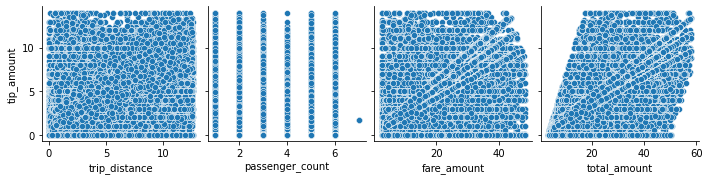

In [22]:
corr = np.corrcoef(y_01_fare['trip_distance'], y_01_fare['tip_amount'])
print(corr)

pp = sns.pairplot(data=y_01_fare,
                  y_vars=['tip_amount'],
                  x_vars=['trip_distance', 'passenger_count', 'fare_amount', 'total_amount'])

# tip count by region

In [5]:

# y_01_fare.groupby(['DOloc', 'Fruit'])['Number'].agg('sum')
loc_tip_s1 = y_s1_fare.groupby('DOloc')['tip_amount'].agg('sum')
loc_tip_s1 = pd.DataFrame(loc_tip_s1, index = loc_tip_s1.index)
loc_tip_s1['count'] = y_s1_fare['DOloc'].value_counts().sort_index()
loc_tip_s1.tip_amount = pd.to_numeric(loc_tip_s1.tip_amount, errors='coerce')
loc_tip_s1.count = pd.to_numeric(loc_tip_s1.count, errors='coerce')
loc_tip_s1['avg'] = loc_tip_s1['tip_amount'] / loc_tip_s1['count']
loc_tip_s1

,tip_amount,count,avg
DOloc,,,
1,27.07,23,1.176957
2,19.52,7,2.788571
3,1089.71,472,2.308708
4,171045.83,126413,1.353072
5,5.76,2,2.880000
...,...,...,...
261,215567.43,111885,1.926687
262,478041.24,326466,1.464291
263,703385.43,489256,1.437663


In [12]:
loc_tip_s2 = y_s2_fare.groupby('DOloc')['tip_amount'].agg('sum')
loc_tip_s2 = pd.DataFrame(loc_tip_s2, index = loc_tip_s2.index)
loc_tip_s2['count'] = y_s2_fare['DOloc'].value_counts().sort_index()
loc_tip_s2.tip_amount = pd.to_numeric(loc_tip_s2.tip_amount, errors='coerce')
loc_tip_s2.count = pd.to_numeric(loc_tip_s2.count, errors='coerce')
loc_tip_s2['avg'] = loc_tip_s2['tip_amount'] / loc_tip_s2['count']

In [13]:
loc_tip_s3 = y_s3_fare.groupby('DOloc')['tip_amount'].agg('sum')
loc_tip_s3 = pd.DataFrame(loc_tip_s3, index = loc_tip_s3.index)
loc_tip_s3['count'] = y_s3_fare['DOloc'].value_counts().sort_index()
loc_tip_s3.tip_amount = pd.to_numeric(loc_tip_s3.tip_amount, errors='coerce')
loc_tip_s3.count = pd.to_numeric(loc_tip_s3.count, errors='coerce')
loc_tip_s3['avg'] = loc_tip_s3['tip_amount'] / loc_tip_s3['count']

In [6]:
import geopandas as gpd
sf = gpd.read_file("/Users/miayokka0926/Desktop/MAST30034_Python/data/taxi_zones/taxi_zones.shp")
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
sf


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ..."


In [14]:
gdf_loc_tip_s1 = gpd.GeoDataFrame(pd.merge(loc_tip_s1, sf, left_on=loc_tip_s1.index, right_on='LocationID')).drop('LocationID',axis=1)
gdf_loc_tip_s2 = gpd.GeoDataFrame(pd.merge(loc_tip_s2, sf, left_on=loc_tip_s2.index, right_on='LocationID')).drop('LocationID',axis=1)
gdf_loc_tip_s3 = gpd.GeoDataFrame(pd.merge(loc_tip_s3, sf, left_on=loc_tip_s2.index, right_on='LocationID')).drop('LocationID',axis=1)

gdf_loc_tip_s3

,tip_amount,count,avg,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
0,27.02,33,0.818788,1,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,12.40,6,2.066667,2,0.433470,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,966.25,477,2.025681,3,0.084341,0.000314,Allerton/Pelham Gardens,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,146970.73,106448,1.380681,4,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,0.00,2,0.000000,5,0.092146,0.000498,Arden Heights,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...,...,...
253,1141.95,745,1.532819,259,0.126750,0.000395,Woodlawn/Wakefield,Bronx,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
254,29024.48,23479,1.236189,260,0.133514,0.000422,Woodside,Queens,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
255,205351.67,110889,1.851867,261,0.027120,0.000034,World Trade Center,Manhattan,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."
256,388532.50,259574,1.496808,262,0.049064,0.000122,Yorkville East,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ..."


<function matplotlib.pyplot.show(close=None, block=None)>

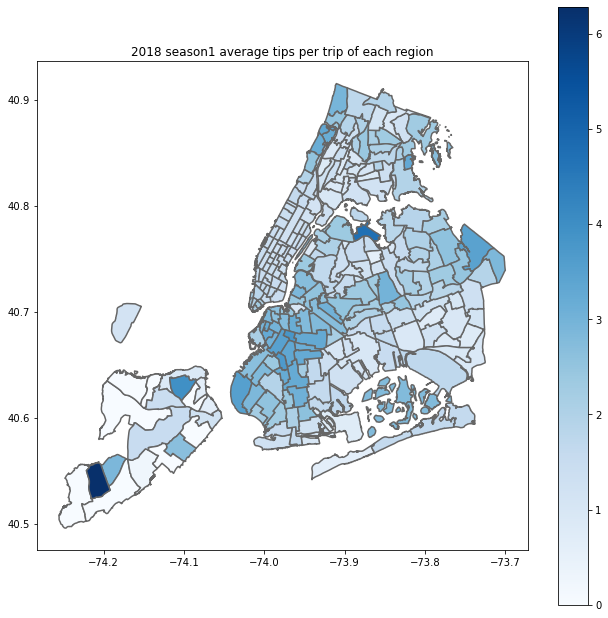

In [8]:
y_var = "avg"
vmin, vmax = 0, gdf_loc_tip_s1['avg'].max()
fig, ax = plt.subplots(1, figsize=(11,11))

#title and annotation
ax.set_title('2018 season1 average tips per trip of each region')

#colorbar legend
sn = plt.cm.ScalarMappable(cmap = 'Blues', norm = plt.Normalize(vmin=vmin, vmax = vmax))

sn.set_array([])
fig.colorbar(sn)

gdf_loc_tip_s1.plot(column = y_var, cmap="Blues", linewidth=1.5,ax=ax,edgecolor = '0.4')
plt.savefig("../plots/2018 season1 average tips per trip of each region.png")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

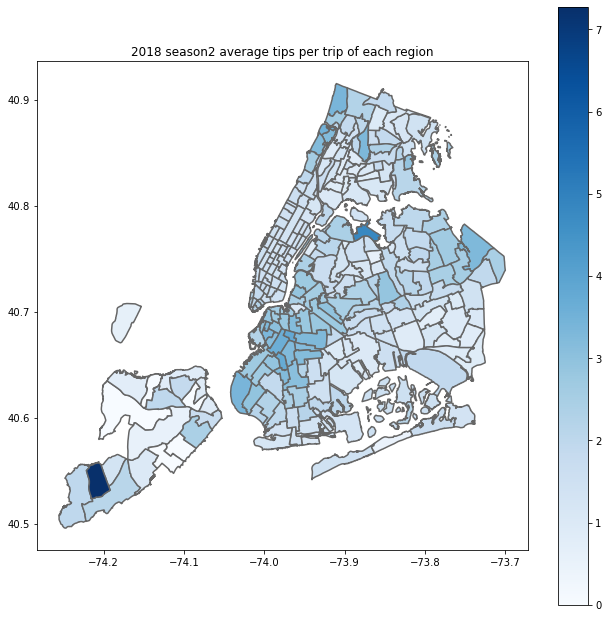

In [15]:
# s2
y_var = "avg"
vmin, vmax = 0, gdf_loc_tip_s2['avg'].max()
fig, ax = plt.subplots(1, figsize=(11,11))

#title and annotation
ax.set_title('2018 season2 average tips per trip of each region')

#colorbar legend
sn = plt.cm.ScalarMappable(cmap = 'Blues', norm = plt.Normalize(vmin=vmin, vmax = vmax))

sn.set_array([])
fig.colorbar(sn)

gdf_loc_tip_s2.plot(column = y_var, cmap="Blues", linewidth=1.5,ax=ax,edgecolor = '0.4')
plt.savefig("../plots/2018 season2 average tips per trip of each region.png")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

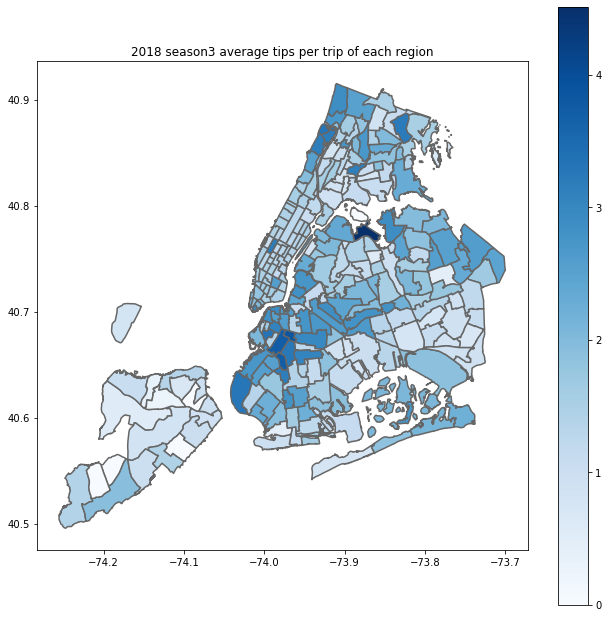

In [16]:
# s3
y_var = "avg"
vmin, vmax = 0, gdf_loc_tip_s3['avg'].max()
fig, ax = plt.subplots(1, figsize=(11,11))

#title and annotation
ax.set_title('2018 season3 average tips per trip of each region')

#colorbar legend
sn = plt.cm.ScalarMappable(cmap = 'Blues', norm = plt.Normalize(vmin=vmin, vmax = vmax))

sn.set_array([])
fig.colorbar(sn)

gdf_loc_tip_s3.plot(column = y_var, cmap="Blues", linewidth=1.5,ax=ax,edgecolor = '0.4')
plt.savefig("../plots/2018 season3 average tips per trip of each region.png")
plt.show


# tips count by time in a day

In [16]:
loc_time_s1 = y_01_fare.groupby('DOtime')['tip_amount'].agg('sum')
loc_time = pd.DataFrame(loc_time, index = loc_time.index)
loc_time['count'] = y_01_fare['DOtime'].value_counts().sort_index()
loc_time.tip_amount = pd.to_numeric(loc_time.tip_amount, errors='coerce')
loc_time.count = pd.to_numeric(loc_time.count, errors='coerce')
loc_time['avg'] = loc_time['tip_amount'] / loc_time['count']

loc_time

,tip_amount,count,avg
DOtime,,,
00,415893.73,252359,1.648024
01,301609.02,187184,1.611297
02,221783.29,141423,1.568226
03,149865.65,100687,1.488431
04,101612.30,75753,1.341363
05,77143.28,67161,1.148632
06,172375.87,154910,1.112748
07,363901.21,280307,1.298224
08,542021.83,374570,1.447051


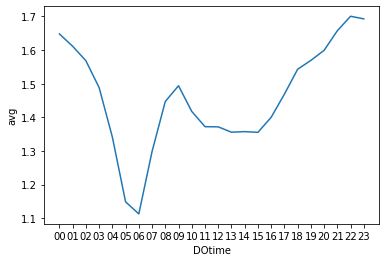

In [29]:
sns.lineplot(x = "DOtime", y = "avg", data = loc_time)

plt.show()

# Demand count by time on a day

In [1]:
plt.lineplot(x = "DOtime", y = "count", data = loc_time, colour = 'slateblue')

plt.show()

NameError: name 'plt' is not defined